In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
#nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rehim\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [2]:
df = pd.read_csv('./Reviews.csv')


In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [5]:
print(df.shape)

(568454, 10)


In [6]:
df = df.head(500)
print(df.shape)

(500, 10)


## Quick EDA

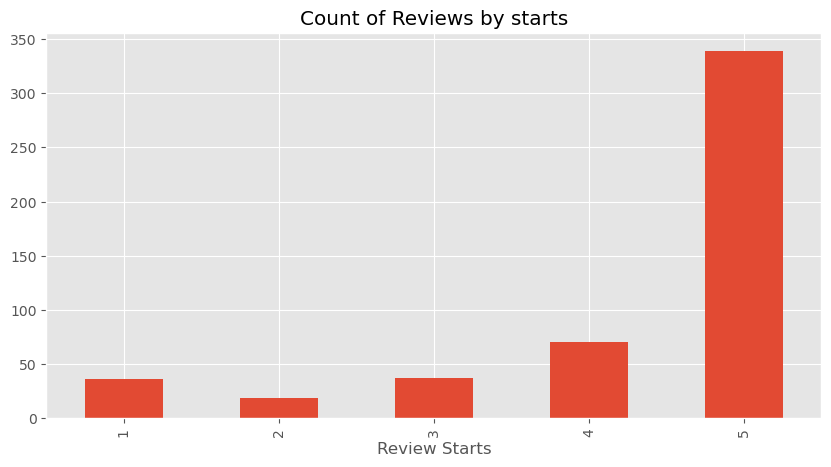

In [7]:
ax = df['Score'].value_counts().sort_index()\
            .plot(kind ='bar',
                  title = 'Count of Reviews by starts' ,
                  figsize = (10,5))

ax.set_xlabel('Review Starts')

plt.show()

In [8]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [9]:
nltk.word_tokenize(example)

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [10]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [13]:
nltk.pos_tag(tokens)

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

In [14]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [16]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\rehim\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\rehim\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [19]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rehim\AppData\Roaming\nltk_data...


True

In [17]:
entities = nltk.chunk.ne_chunk(tagged)
#Pretty print
entities.pprint()


(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from tqdm import tqdm, trange
sia = SentimentIntensityAnalyzer()

In [21]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [22]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [23]:
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [24]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [25]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df), desc = 'Scoring Texts'):
    text = row['Text']
    myid = row['Id']
    scores = sia.polarity_scores(text)
    res[myid] = {
        'Text': text,
        **scores
    }

Scoring Texts: 100%|███████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1364.30it/s]


In [30]:
res_df = pd.DataFrame.from_dict(res, orient='index')
print(res_df.head(5))

                                                Text    neg    neu    pos  \
1  I have bought several of the Vitality canned d...  0.000  0.695  0.305   
2  Product arrived labeled as Jumbo Salted Peanut...  0.138  0.862  0.000   
3  This is a confection that has been around a fe...  0.091  0.754  0.155   
4  If you are looking for the secret ingredient i...  0.000  1.000  0.000   
5  Great taffy at a great price.  There was a wid...  0.000  0.552  0.448   

   compound  
1    0.9441  
2   -0.5664  
3    0.8265  
4    0.0000  
5    0.9468  


In [31]:

result= {}
for i,row in tqdm(df.iterrows(), total=len(df),desc ='Scoring Texts'):
    text =row['Text']
    myId =row['Id']
    result[myId] = sia.polarity_scores(text)

Scoring Texts: 100%|███████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1195.98it/s]


In [33]:
result_df = pd.DataFrame.from_dict(result, orient='index')
print(result_df.head(5))

     neg    neu    pos  compound
1  0.000  0.695  0.305    0.9441
2  0.138  0.862  0.000   -0.5664
3  0.091  0.754  0.155    0.8265
4  0.000  1.000  0.000    0.0000
5  0.000  0.552  0.448    0.9468


In [34]:
#result

In [37]:
pd.DataFrame(res).T

,Text,neg,neu,pos,compound
1,I have bought several of the Vitality canned d...,0.0,0.695,0.305,0.9441
2,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.0,-0.5664
3,This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265
4,If you are looking for the secret ingredient i...,0.0,1.0,0.0,0.0
5,Great taffy at a great price. There was a wid...,0.0,0.552,0.448,0.9468
...,...,...,...,...,...
496,i rarely eat chips but i saw these and tried t...,0.0,0.554,0.446,0.9725
497,This is easily the best potato chip that I hav...,0.059,0.799,0.142,0.7833
498,Kettle Chips Spicy Thai potato chips have the ...,0.025,0.762,0.212,0.9848
499,"Okay, I should not eat potato chips, nor shoul...",0.041,0.904,0.055,0.128


In [38]:
data= pd.DataFrame(res).T

In [39]:
data

,Text,neg,neu,pos,compound
1,I have bought several of the Vitality canned d...,0.0,0.695,0.305,0.9441
2,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.0,-0.5664
3,This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265
4,If you are looking for the secret ingredient i...,0.0,1.0,0.0,0.0
5,Great taffy at a great price. There was a wid...,0.0,0.552,0.448,0.9468
...,...,...,...,...,...
496,i rarely eat chips but i saw these and tried t...,0.0,0.554,0.446,0.9725
497,This is easily the best potato chip that I hav...,0.059,0.799,0.142,0.7833
498,Kettle Chips Spicy Thai potato chips have the ...,0.025,0.762,0.212,0.9848
499,"Okay, I should not eat potato chips, nor shoul...",0.041,0.904,0.055,0.128


In [40]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [41]:
# Now we have sentiment score and metadata
vaders.head()

,Id,Text,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary
0,1,I have bought several of the Vitality canned d...,0.0,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food
1,2,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.0,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised
2,3,This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all"
3,4,If you are looking for the secret ingredient i...,0.0,1.0,0.0,0.0,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine
4,5,Great taffy at a great price. There was a wid...,0.0,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy


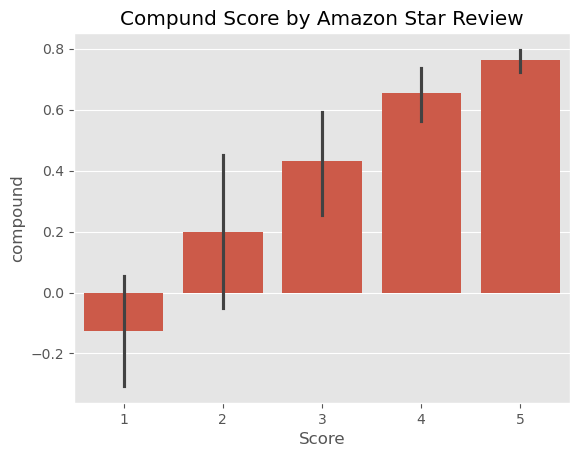

In [42]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

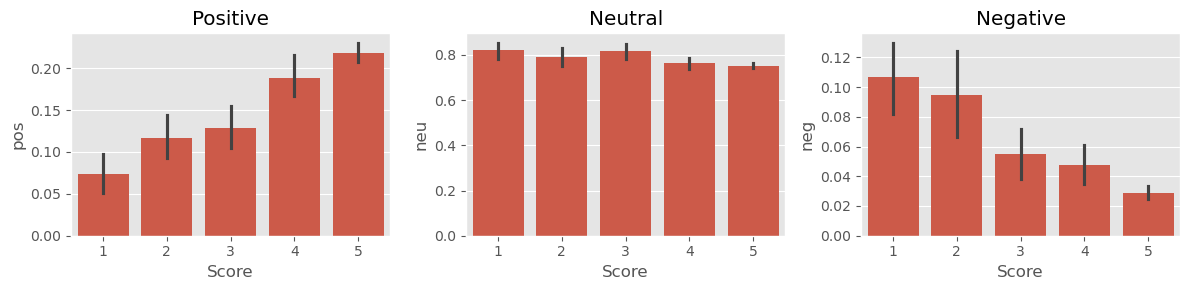

In [43]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()